In [18]:
import sys
sys.path.append('./sphere_connector_package')
from sphere_connector import SphereConnector, DataWindow
import pandas as pd
from datetime import datetime, timedelta
from pytz import UTC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [19]:
def parser(s):
    d, m = s.split('/')
    return datetime(2016, int(m), int(d))

day_func = lambda h: 0 if int(h) < 12 else -1

def parse_time(d, t, day_func):
    h, m = t.split(":")
    td = timedelta(days=day_func(h), hours=int(h), minutes=int(m))
    return d + td

df = pd.read_csv('../Sphere-csv-data/Sleep Data Research - ASD Morning.csv', skiprows=1)
df.head()
df.dtypes
# [df.Date.apply(parser),df["Time in Bed"]]
df.Date = df.Date.apply(parser)
df["Start"] = df.apply(lambda row: parse_time(row.Date, row['Time in Bed'], day_func), axis=1)
df["End"] = df.apply(lambda row: parse_time(row.Date, row['Time to get up'], day_func), axis=1)

In [25]:
sc = SphereConnector(include_mongo=True, include_redcap=False)

 61%|██████▏   | 810321/1322687 [03:30<02:12, 3852.40it/s]

In [26]:
nodata = [4] + range(6, 22)

for row in df.itertuples():
    if row[0] in nodata:
        continue
    print(row[0])
    start = row.Start.to_datetime().replace(tzinfo=UTC) - timedelta(hours=1)
    end = row.End.to_datetime().replace(tzinfo=UTC) + timedelta(hours=1)
    # end = start + timedelta(seconds=10)
    print(start, end)
    print("db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('" +
          start.isoformat() +
          "'), $lte: ISODate('" +
          end.isoformat() + "')}})")
    dw = DataWindow(sphere_connector=sc, start=start, end=end)
    env = pd.DataFrame(dw.environmental.get_data(rename_keys=False))
    if not env.empty:
        env.set_index('datetime', inplace=True)
    else:
        print('No environmental data')
        continue
    wear = pd.DataFrame(dw.wearable.get_data(elements=('xl', 'mag', 'rss'), rename_keys=False))
    if not wear.empty:
        for i, ax in enumerate(['x', 'y', 'z']):
            wear['wearable-xl1-' + ax] = wear['wearable-xl1'].apply(lambda x: x[i] if not isinstance(x, float) else np.NaN)
        del wear['wearable-xl1']
        wear.set_index('datetime', inplace=True)
        dfm = env.merge(wear, left_index=True, right_index=True, how='outer', suffixes=['-env', '-wear'], on='uid')
    else:
        print('No wearable data')
        continue
        # if not env.empty:
        #    dfm = env
    #if (len(merged) > 0):
    #    merged[-1]['index'] = i
    dfm.hid = pd.to_numeric(dfm.hid)
    dfm.aid = dfm.aid.apply(lambda x: hex(int(x, 16)) if isinstance(x, unicode) else np.NaN)
    # dfm.to_pickle("data_{}.pkl".format(row[0]))
    dfm.to_csv("data_{:02d}.csv.gz".format(row[0]), compression='gzip')


100%|██████████| 1330628/1330628 [04:25<00:00, 5005.81it/s]

0
(datetime.datetime(2016, 5, 31, 22, 0, tzinfo=<UTC>), datetime.datetime(2016, 6, 1, 8, 0, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-05-31T22:00:00+00:00'), $lte: ISODate('2016-06-01T08:00:00+00:00')}})
1


100%|██████████| 1379577/1379577 [04:30<00:00, 5105.00it/s]


(datetime.datetime(2016, 6, 1, 22, 30, tzinfo=<UTC>), datetime.datetime(2016, 6, 2, 7, 30, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-06-01T22:30:00+00:00'), $lte: ISODate('2016-06-02T07:30:00+00:00')}})
2


100%|██████████| 1259892/1259892 [03:59<00:00, 5269.03it/s]


(datetime.datetime(2016, 6, 2, 22, 0, tzinfo=<UTC>), datetime.datetime(2016, 6, 3, 8, 0, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-06-02T22:00:00+00:00'), $lte: ISODate('2016-06-03T08:00:00+00:00')}})
3


100%|██████████| 1468672/1468672 [04:53<00:00, 5000.83it/s]


(datetime.datetime(2016, 4, 19, 22, 0, tzinfo=<UTC>), datetime.datetime(2016, 4, 20, 9, 25, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-04-19T22:00:00+00:00'), $lte: ISODate('2016-04-20T09:25:00+00:00')}})
5


100%|██████████| 1322687/1322687 [04:33<00:00, 4843.32it/s]


(datetime.datetime(2016, 4, 21, 22, 30, tzinfo=<UTC>), datetime.datetime(2016, 4, 22, 9, 50, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-04-21T22:30:00+00:00'), $lte: ISODate('2016-04-22T09:50:00+00:00')}})
22


100%|██████████| 1073532/1073532 [03:42<00:00, 4828.22it/s]


(datetime.datetime(2016, 5, 23, 22, 12, tzinfo=<UTC>), datetime.datetime(2016, 5, 24, 7, 28, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-05-23T22:12:00+00:00'), $lte: ISODate('2016-05-24T07:28:00+00:00')}})
23


100%|██████████| 1039371/1039371 [04:07<00:00, 4193.15it/s]


(datetime.datetime(2016, 5, 24, 22, 10, tzinfo=<UTC>), datetime.datetime(2016, 5, 25, 7, 37, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-05-24T22:10:00+00:00'), $lte: ISODate('2016-05-25T07:37:00+00:00')}})
24


100%|██████████| 1160022/1160022 [04:10<00:00, 4632.79it/s]


(datetime.datetime(2016, 5, 25, 21, 31, tzinfo=<UTC>), datetime.datetime(2016, 5, 26, 8, 6, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-05-25T21:31:00+00:00'), $lte: ISODate('2016-05-26T08:06:00+00:00')}})
25


100%|██████████| 958604/958604 [03:15<00:00, 4894.04it/s]


(datetime.datetime(2016, 5, 26, 21, 13, tzinfo=<UTC>), datetime.datetime(2016, 5, 27, 7, 30, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-05-26T21:13:00+00:00'), $lte: ISODate('2016-05-27T07:30:00+00:00')}})
26


100%|██████████| 106141/106141 [00:03<00:00, 28437.40it/s]
0it [00:00, ?it/s]


(datetime.datetime(2016, 7, 25, 23, 15, tzinfo=<UTC>), datetime.datetime(2016, 7, 26, 9, 20, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-07-25T23:15:00+00:00'), $lte: ISODate('2016-07-26T09:20:00+00:00')}})
No wearable data



100%|██████████| 111548/111548 [00:03<00:00, 28306.78it/s]
0it [00:00, ?it/s]


27
(datetime.datetime(2016, 7, 26, 23, 15, tzinfo=<UTC>), datetime.datetime(2016, 7, 27, 9, 0, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-07-26T23:15:00+00:00'), $lte: ISODate('2016-07-27T09:00:00+00:00')}})
No wearable data



100%|██████████| 110664/110664 [00:03<00:00, 28250.01it/s]
0it [00:00, ?it/s]


28
(datetime.datetime(2016, 7, 27, 23, 20, tzinfo=<UTC>), datetime.datetime(2016, 7, 28, 9, 0, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-07-27T23:20:00+00:00'), $lte: ISODate('2016-07-28T09:00:00+00:00')}})
No wearable data



0it [00:00, ?it/s]


29
(datetime.datetime(2016, 8, 16, 9, 45, tzinfo=<UTC>), datetime.datetime(2016, 8, 16, 8, 50, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-08-16T09:45:00+00:00'), $lte: ISODate('2016-08-16T08:50:00+00:00')}})
No environmental data



0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]


30
(datetime.datetime(2016, 8, 17, 9, 55, tzinfo=<UTC>), datetime.datetime(2016, 8, 17, 8, 20, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-08-17T09:55:00+00:00'), $lte: ISODate('2016-08-17T08:20:00+00:00')}})
No environmental data
31
(datetime.datetime(2016, 8, 16, 10, 0, tzinfo=<UTC>), datetime.datetime(2016, 8, 16, 12, 0, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-08-16T10:00:00+00:00'), $lte: ISODate('2016-08-16T12:00:00+00:00')}})
No environmental data
32
(datetime.datetime(2016, 8, 17, 10, 0, tzinfo=<UTC>), datetime.datetime(2016, 8, 17, 9, 55, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-08-17T10:00:00+00:00'), $lte: ISODate('2016-08-17T09:55:00+00:00')}})
No environmental data
33
(datetime.datetime(2016, 8, 5, 23, 0, tzinfo=<UTC>), datetime.datetime(2016, 8, 6, 11, 10, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-08-05T23



0it [00:00, ?it/s]

0it [00:00, ?it/s]


36
(datetime.datetime(2016, 10, 7, 22, 15, tzinfo=<UTC>), datetime.datetime(2016, 10, 8, 9, 20, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-10-07T22:15:00+00:00'), $lte: ISODate('2016-10-08T09:20:00+00:00')}})
No environmental data
37
(datetime.datetime(2016, 10, 8, 23, 15, tzinfo=<UTC>), datetime.datetime(2016, 10, 9, 9, 30, tzinfo=<UTC>))
db.getCollection('WEARABLE-ISO-TIME').find({wts: {$gt: ISODate('2016-10-08T23:15:00+00:00'), $lte: ISODate('2016-10-09T09:30:00+00:00')}})
No environmental data


In [194]:
dfm = pd.concat(merged)
dfm.set_index('index', inplace=True, append=True)
dfm.sort_index(inplace=True)
dfm.head()

,,aid,cold-water,door,dust,electricity,hid,hot-water,humidity,light,motion,noise,temperature,uid,wearable-mag-xl1,wearable-rss,wearable-xl1-x,wearable-xl1-y,wearable-xl1-z
datetime,index,,,,,,,,,,,,,,,,,,
2016-04-19 22:59:59.909856+00:00,2,b827eb524fec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0.033973,-77.0,-0.610,0.038,0.834
2016-04-19 22:59:59.959904+00:00,2,b827eb524fec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0.023627,-77.0,-0.606,0.040,0.824
2016-04-19 23:00:00.009952+00:00,2,b827eb524fec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0.024736,-77.0,-0.608,0.038,0.824
2016-04-19 23:00:00.060000+00:00,2,b827eb524fec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0.014820,-77.0,-0.602,0.040,0.816
2016-04-19 23:00:00.109856+00:00,2,b827eb524fec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0.028247,-78.0,-0.606,0.034,0.830


In [236]:
pd.get_dummies(dfm.uid)
dummies = pd.get_dummies(dfm.uid).rename(columns=lambda x: 'uid_' + str(x))
dfmd = pd.concat([dfm, dummies], axis=1)
dfmd.drop(['uid'], inplace=True, axis=1)
dfmd.head()

dfmd.to_hdf(path_or_buf='merged.mat', key='df')

NameError: name 'dfmd' is not defined

In [2]:
fig, ax = plt.subplots(figsize=(15, 10))
dfm['wearable-mag-xl1'].loc[[slice(None), 3]].dropna().plot(ax=ax)


NameError: name 'plt' is not defined

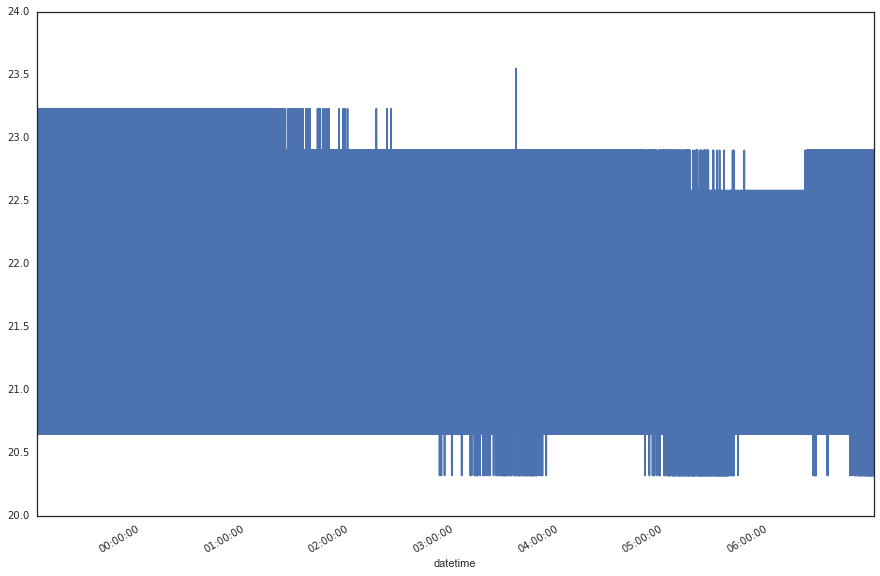

In [166]:
fig, ax = plt.subplots(figsize=(15, 10))
dfm['temperature'].loc[[slice(None), 3]].dropna().plot(ax=ax)